<a href="https://colab.research.google.com/github/BorisMejiasII/Hierarchical-Clustering/blob/main/Notebook_Tarea_Zoo_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering Jerárquico en el Dataset Zoo
Este notebook es una base para la tarea de clustering jerárquico usando el dataset Zoo.

In [10]:
# ===============================
# Paso 1: Cargar el dataset
# ===============================

import pandas as pd

url = 'https://raw.githubusercontent.com/BorisMejiasII/Hierarchical-Clustering/main/zoo.csv'
df = pd.read_csv(url)

# Mostrar Algunos datos para confirmar la correcta subida de los datos
df.head()


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [11]:
# ===============================
# Paso 2: Preprocesamiento
# ===============================

from sklearn.preprocessing import StandardScaler

# 2.1. Separar atributos (X) del resto
# Dejamos únicamente las columnas numéricas para clustering
X = df.drop(['animal_name', 'class_type'], axis=1)

# 2.2. Escalamiento (utilizando StandardScaler)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertimos nuevamente a DataFrame (opcional, para inspección)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180
1,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180
2,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,1.343710,0.896421,0.809776,0.46569,-1.951800,-0.293294,2.222876,-1.404435,0.588784,-0.384353,-0.878595
3,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180
4,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180


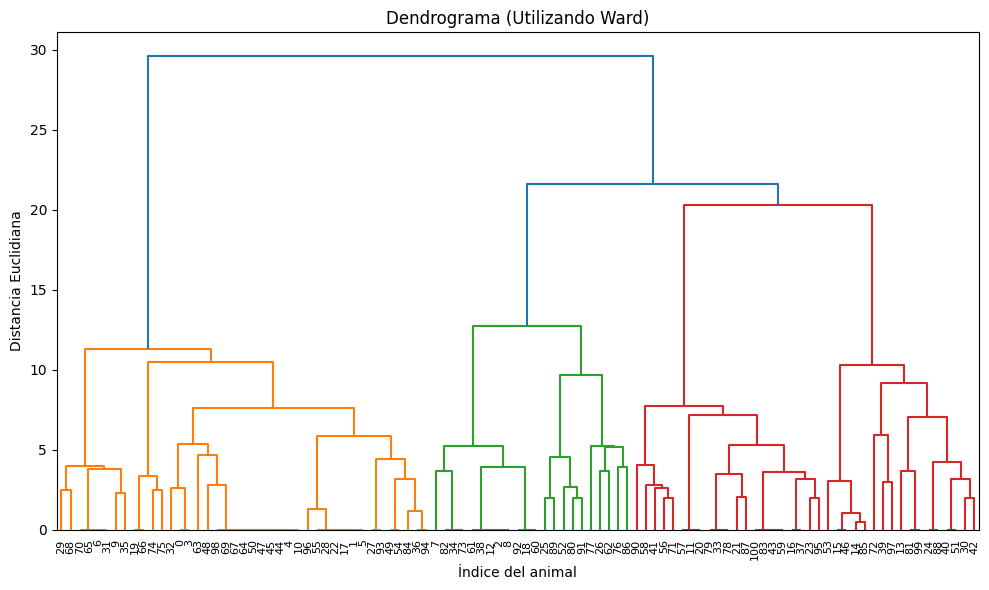

,animal_name,Cluster
0,aardvark,2
1,antelope,2
2,bass,4
3,bear,2
4,boar,2
5,buffalo,2
6,calf,5
7,carp,4
8,catfish,4
9,cavy,5


In [14]:
# Paso 3: Clustering Jerárquico

# ===============================
# Paso 3: Clustering Jerárquico
#   - Dibujar dendrograma
#   - Ajustar el agrupamiento aglomerativo y asignar etiquetas de cluster
# ===============================

import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# 3.1. Dendrograma (método Ward)
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(
    sch.linkage(X_scaled, method='ward'),
    leaf_rotation=90,
    leaf_font_size=8
)
plt.title("Dendrograma (Utilizando Ward)")
plt.xlabel("Índice del animal")
plt.ylabel("Distancia Euclidiana")
plt.tight_layout()
plt.show()

# 3.2. Ajustar AgglomerativeClustering
#     Con linkage='ward' ya se usa métrica euclidiana por defecto,
#     así que no hace falta especificar 'metric' ni 'affinity'.
n_clusters = 7
hc = AgglomerativeClustering(
    n_clusters=n_clusters,
    linkage='ward'
)
y_hc = hc.fit_predict(X_scaled)

# 3.3. Añadir la columna 'Cluster' al DataFrame original
df['Cluster'] = y_hc

# 3.4. Mostrar algunos animales con su asignación de cluster
df[['animal_name', 'Cluster']].head(10)




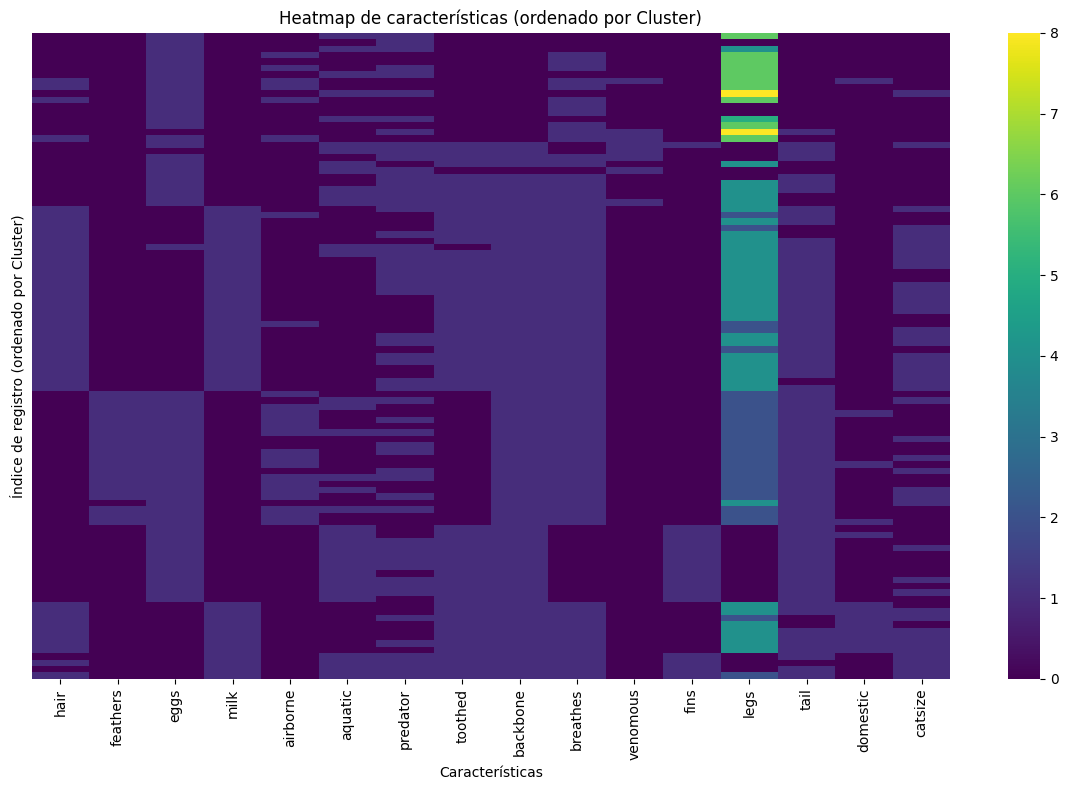

In [13]:
# ===============================
# Paso 4: Heatmap de características por cluster
# ===============================

import seaborn as sns

# 4.1. Reordenar el DataFrame por el valor de 'Cluster'
df_clustered = df.sort_values(by='Cluster').reset_index(drop=True)

# 4.2. Creamos un DataFrame solo con las variables numéricas
# (sin animal_name, class_type ni Cluster)
X_clustered = df_clustered.drop(['animal_name', 'class_type', 'Cluster'], axis=1)

# 4.3. Dibujar heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    X_clustered,
    cmap='viridis',
    cbar=True,
    xticklabels=True,
    yticklabels=False
)
plt.title("Heatmap de características (ordenado por Cluster)")
plt.xlabel("Características")
plt.ylabel("Índice de registro (ordenado por Cluster)")
plt.tight_layout()
plt.show()




# Conclusiones
Escribe aquí tus conclusiones sobre las agrupaciones obtenidas en el clustering jerárquico.

## Pregunta 1
1. ¿Cuántos clusters se pueden identificar claramente en el dendrograma?

Si observamos el dendrograma, podemos distinguir al menos 4 grupos principales a un nivel general (en donde están los saltos más grandes en la "altura", por decirlo de alguna forma), aunque al cortar a una altura más baja, surgen hasta 7 grupos bien diferenciados. En la práctica, el número “ideal” depende de la altura de corte que elijamos:

*   A una altura alta (en donde el corte es más grueso) se ven 4 clusters grandes: peces/acuáticos, aves/voladores, mamíferos terrestres y reptiles/otros.
*   Si bajamos el corte para obtener más detalle, aparecen 7 subgrupos que corresponden mejor a categorías más específicas (por ejemplo, distingue mamíferos domésticos vs salvajes, o distingue diferentes tipos de aves y peces,etc).



## Pregunta 2
2. ¿Qué características parecen determinar la formación de los clusters?

Las principales variables que impulsan la separación en este dataset son rasgos binarios muy distintivos a simple vista, algunas de estás variable son:

Feathers (plumas): Separa automáticamente las aves del resto.

Milk (leche) y hair (pelo): Aquí se agrupan a los mamíferos, pues casi todos los mamíferos tienen “hair = 1” y “milk = 1”.

Eggs (huevos): Aunque es verdad que varias clases ponen huevos, en combinación con otros atributos permite distinguir entre reptiles/pesces de aves.

Airborne (volador) vs aquatic (acuático): Separa animales voladores (aves, murciélagos) de los acuáticos (peces, cetáceos), y además de los estrictamente terrestres.

Predator (depredador), venomous (venenoso) y toothed (dentado): ayudan a subclasificar dentro de grupos. Por ejemplo,se puede realizar la distinción entre reptiles venenosos de reptiles no venenosos, o separados de peces carnívoros.

Legs (número de patas): asigna valores distintos (0,2,4,6,8) que influyen en la distancia euclidiana una vez escalados, colaborando a diferenciar insectos (legs = 6) de mamíferos terrestres (legs = 4), etc.

Sin embargo, de todos los anteriores los más determinantes para la formación de los cluster son los rasgos “feathers”, “hair” y “milk”, puesto que gracias a ellos se permite segmentar aves, mamíferos y peces/reptiles, y luego atributos como “aquatic”, “airborne” y “legs” afinan la agrupación dentro de cada macrogrupo.

## Pregunta 3
3. ¿Los resultados del clustering tienen sentido biológico o zoológico?

Completamente, tiene todo el sentido, puesto que biológicamente, vemos que:

Mamíferos (todos con hair=1 y milk=1) tienden a agruparse juntos (ya sean domésticos o salvajes).

Aves (feathers=1) forman un cluster propio que a veces se subdivide según vuelo o tamaño (ej. pingüinos vs halcones).

Peces (aquatic=1, eggs=1, hair=0, feathers=0) quedan en un grupo coherente con especies acuáticas.

Reptiles y anfibios (eggs=1, pero sin hair ni milk ni feathers) aparecen juntos o en clusters vecinos, diferenciándose a veces por “venomous” o “toothed”.

Por lo tanto, el clustering refleja categorías "zoológicas" bastante plausibles, es decir, separa mamíferos, aves, peces y reptiles. Quizás no distingue perfectamente todas las subclases (por ejemplo, separa tiburones de salmones en diferentes subgrupos de peces, lo que se podría consigerar un error, pero claramente existe un margen de mejora), pero a grandes rasgos sí refleja la lógica de clasificación biológica.

## Pregunta 4
4. ¿Cómo afecta la normalización de los datos al clustering?

Sin normalización, las variables con rangos numéricos mayores (p. ej., “legs” que varía entre 0 y 8) dominarían la medida de distancia euclidiana y desplazarían el agrupamiento, relegando los rasgos binarios (“feathers”, “hair”, etc.) a un peso muy bajo. Al aplicar StandardScaler (media 0, desviación 1):

Cada atributo queda en la misma escala (valor promedio ≈ 0 y varianza ≈ 1).

Los indicadores binarios (0/1) y las variables discretas (número de patas) contribuyen con peso similar a la distancia.

De esta forma, no predomina únicamente “legs” o cualquier otra variable numérica, sino que el clustering combina información de todos los rasgos.

En resumen, la normalización garantiza que cada característica aporte de manera equilibrada, permitiendo que rasgos como “milk”, “feathers” o “aquatic” influyan tanto como “legs” en la formación de los clusters.

## Pregunta 5
5. ¿Qué método de linkage utilizaste y por qué?

El método de linkage que he utilizado es “ward”, puesto que frente a otros métodos de linkage presenta varias ventajas, algunas de estas son las siguientes:

Minimiza la varianza intracluster en cada fusión (busca unir dos grupos que resulten en la menor suma de cuadrados interna al nuevo cluster).

Produce clusters "relativamente" equilibrados en términos de varianza interna, lo cual suele ser deseable cuando no conocemos la forma exacta de los clusters.

Es adecuado para datos cuantitativos (o binarios tratados como 0/1 tras escalado), pues “Ward” asume distancia euclidiana.

Otras opciones de linkage (como “single” o “complete”) tienden a generar formas de cluster muy alargadas o sensibles a outliers (valores atípicos). Con “ward” conseguimos grupos más compactos, lo cual en este problema biológico/zoológico suele dar agrupaciones más coherentes.

## Pregunta 6
6. ¿Qué otras técnicas de clustering podrías aplicar a este dataset y por qué?

Una alternativa relativamente sencilla y común para casos como este sería K-Means.

Cómo funcionaría para este caso:

1.-Tras normalizar los datos, K-Means elige k centroides aleatorios.
2.-Asigna cada animal al centroide más cercano (distancia euclidiana) y recalcula los centroides iterativamente hasta la convergencia.

Por qué convendría usarlo para este caso:

1.-Simple y rápido en un conjunto de ~100 animales y atributos binarios/numerales.
2.-Interpretación clara: cada cluster tiene un “vector promedio” de rasgos (p. ej., “hair ≈ 1, milk ≈ 1” para mamíferos).
3.-Permite explorar distintos valores de k (usando el método del codo, por ejemplo) para ver cuántos grupos hacen sentido biológico.


Ventajas:

1.-Algoritmo eficiente para datos normalizados.
2.-Centroides fáciles de interpretar.


Desventajas:

1.-Requiere decidir k de antemano.
2.-Asume clusters con forma aproximadamente esférica.
3.-Sensible a valores atípicos.


En resumen, K-Means es una opción rápida y entendible para agrupar a los animales del dataset Zoo, siempre y cuando elijamos adecuadamente el número de clusters y aceptemos (puesto que no se puede cambiar) la forma esférica de los grupos formados.